<a href="https://colab.research.google.com/github/leandroriverogonzalez/eea/blob/main/eea_tp2_np_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 2.5 MB/s 
     |████████████████████████████████| 155 kB 19.8 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [2]:
import pandas as pd 
from neuralprophet import NeuralProphet

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/datos/temperature.csv") 

In [11]:
df = df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'})

In [19]:
df['date'] = pd.to_datetime(df[["year", "month", "day"]])

In [20]:
df.rename(columns={"date": "ds", "T2M": "y"}, inplace=True)

In [22]:
df = df[["ds", "y"]] 

In [23]:
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
    #,    log_level=None, # Determines the logging level of the logger object
)

In [24]:
metrics = model.fit(df, freq="D") 
future = model.make_future_dataframe(df, periods=365, n_historic_predictions=len(df)) 
forecast = model.predict(future)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64


  0%|          | 0/308 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.30E-02, min: 2.44E+00


  0%|          | 0/308 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.81E-02, min: 1.33E+00


  0%|          | 0/308 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.35E-02, min: 2.44E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.81E-02
Epoch[40/40]: 100%|██████████| 40/40 [00:17<00:00,  2.29it/s, SmoothL1Loss=7.31e-5, MAE=2.81, RMSE=4.47, RegLoss=0]


In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean Temperature in Delhi')

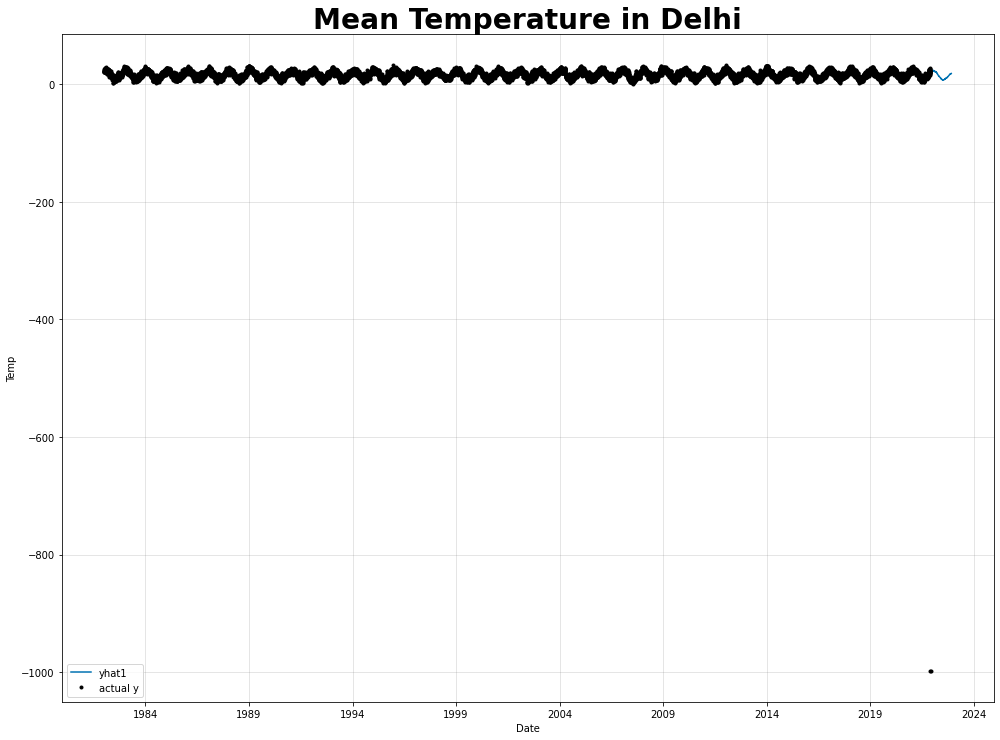

In [26]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("Mean Temperature in Delhi", fontsize=28, fontweight="bold")


In [27]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,1982-01-01,21.46,24.529846,3.069846,16.452271,8.003798,0.073792
1,1982-01-02,23.49,24.370972,0.880972,16.452637,8.074474,-0.156165
2,1982-01-03,25.12,24.675842,-0.444158,16.453003,8.136136,0.086741
3,1982-01-04,26.29,24.733582,-1.556418,16.453369,8.188703,0.091519
4,1982-01-05,23.47,24.649597,1.179597,16.453735,8.232151,-0.036291
...,...,...,...,...,...,...,...
14937,2022-11-24,NaN,18.135681,NaN,15.167542,3.007800,-0.039632
14938,2022-11-25,NaN,18.327026,NaN,15.167053,3.086214,0.073792
14939,2022-11-26,NaN,18.180115,NaN,15.166565,3.169757,-0.156165
14940,2022-11-27,NaN,18.511475,NaN,15.166077,3.258645,0.086741
